In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
# Membaca data dari CSV
df = pd.read_csv('data\data_crawling.csv', sep=",")

# Tampilkan beberapa baris pertama untuk memeriksa data
print(df.head())

   conversation_id_str                      created_at  favorite_count  \
0  1844732882407067670  Fri Oct 11 13:32:47 +0000 2024            3938   
1  1844888929444691987  Fri Oct 11 23:52:51 +0000 2024            2759   
2  1840673119104885127  Mon Sep 30 08:40:44 +0000 2024            3776   
3  1843635634914918666  Tue Oct 08 12:52:43 +0000 2024              29   
4  1844672993034932495  Fri Oct 11 09:34:48 +0000 2024              58   

                                           full_text               id_str  \
0  Timnas bahrain harusnya malu sih karena media ...  1844732882407067670   
1   Bahrain have a lot of money but don't have a ...  1844888929444691987   
2  KALENDER TIMNAS INDONESIA DI TAHUN 2024 [OKTOB...  1840673119104885127   
3  Gassss yang mau nobar Indonesia vs Bahrain kam...  1843635634914918666   
4  Netijen Indonesia paling sering ribut dgn neti...  1844672993034932495   

                                           image_url in_reply_to_screen_name  \
0    https:/

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Alif\AppData\Local\Temp\ipykernel_18628\3000309476.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\data_crawling.csv', sep=",")


In [309]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy'])
stopwords = list_stopwords

In [310]:
def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus URL
    string = re.sub(r'http\S+|www\S+|https\S+', '', string, flags=re.MULTILINE)
    # Menghapus mention (kata yang diawali dengan '@')
    string = re.sub(r'@\w+', '', string)
    # Menghapus hashtag (hanya simbol '#' tapi tetap membiarkan kata setelahnya)
    string = re.sub(r'#', '', string)
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    # Menghapus RT
    string = re.sub(r'rt', '', string)
    return string

# Kita hanya memerlukan 'full_text' untuk analisis sentimen
df = df[['full_text']]

df['full_text'] = df.full_text.apply(cleansing)

# Simpan DataFrame yang telah dibersihkan (opsional)
df.to_csv('data_crawling_cleaned.csv', index=False)

In [311]:
df = pd.read_csv('data/data_crawling_cleaned.csv', sep=",")
df = df.rename(columns={'full_text': 'Tweet'})
df['Tweet'] = df.Tweet.apply(cleansing)
df = df.Tweet.to_list()
df[:10]

['timnas bahrain harusnya malu sih karena media asing mulai menotice kontroversi dari wasit ahmed al kaf pada laga indonesia vs bahrain  bahkan beberapa dari media asing mengatakan poin yang didapat bahrain tadi malam karena dibantu oleh wasit  timnasday afcmafia ',
 ' bahrain have a lot of money but don t have a class  komentar terbaik dari suppoer timnas indonesia vs bahrain  menyala ',
 'kalender timnas indonesia di tahun 2024  oktober  timnas senior   r3 kualifikasi piala dunia 2026 10 10     bahrain vs indonesia    15 10     china vs indonesia    timnas u17   kualifikasi piala asia u17 2025 23 10     kuwait vs indonesia    25 10     mariana island vs ',
 'gassss yang mau nobar indonesia vs bahrain kamis malem info nobar timnas jogja timnasday ',
 'netijen indonesia paling sering ribut dgn netijen malaysia mengenai keunggulan timnas masing2  namun justru media malaysia yg 1 suara dgn netijen indonesia terkait kontroversi wasit pada peandingan bahrain vs indonesia  ',
 'respon kevin

In [312]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(df[:100])

c:\Users\Alif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [313]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_init=1)

In [314]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

Cluster 0:
 link
 bahrain
 timnas
 indonesia
 vs
 point
 nobar
 info
 streaming
 day

Cluster 1:
 peandingan
 wasit
 indonesia
 timnasday
 bahrain
 timnas
 timnasindonesia
 vs
 malam
 garudamendunia

Cluster 2:
 struick
 babak
 skor
 goal
 rafael
 indonesia
 timnas
 oren
 vs
 bahrain

Cluster 3:
 al
 kaf
 ahmed
 wasit
 laga
 memimpin
 keputusan
 indonesia
 klarifikasi
 mohamed

Cluster 4:
 10
 00
 wib
 23
 piala
 2024
 dunia
 indonesia
 vs
 2026

Cluster 5:
 yong
 tae
 shin
 sulit
 kontroversi
 indonesia
 coach
 dikalahkan
 soroti
 bahrain

Cluster 6:
 oratmangoen
 45
 ragnar
 timnasday
 yukk
 dievaluasi
 mahroon
 ht
 gooolllll
 timnasdaylive

Cluster 7:
 laga
 garuda
 pelatih
 indonesia
 piala
 pemain
 timnas
 bahrain
 asia
 dunia



In [315]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

0.012313819146100538

In [316]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

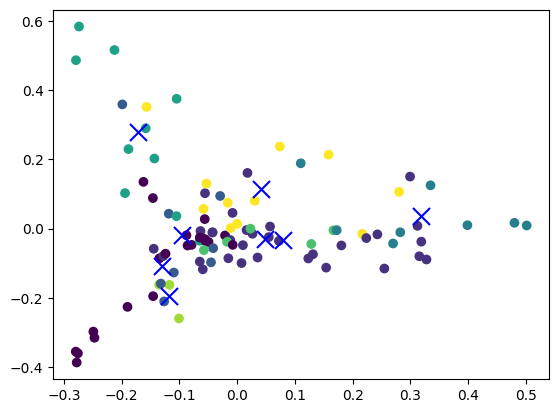

In [317]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')